In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 65.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import yfinance as yf
import pandas as pd

# set the ticker symbol and start/end dates
ticker = "EURUSD=X"
start_date = "2023-01-20"
end_date = "2023-02-25"

# get the currency data with 5 minute frequency
data = yf.download(ticker, start=start_date, end=end_date, interval="5m")

# remove non-trading days
data = data[data.index.dayofweek < 6]

# print the data
print(data)

[*********************100%***********************]  1 of 1 completed
                             Open    High     Low   Close  Adj Close  Volume
Datetime                                                                    
2023-01-20 00:00:00+00:00 1.08366 1.08389 1.08354 1.08354    1.08354       0
2023-01-20 00:05:00+00:00 1.08378 1.08425 1.08378 1.08401    1.08401       0
2023-01-20 00:10:00+00:00 1.08378 1.08448 1.08378 1.08425    1.08425       0
2023-01-20 00:15:00+00:00 1.08413 1.08436 1.08413 1.08425    1.08425       0
2023-01-20 00:20:00+00:00 1.08460 1.08460 1.08425 1.08425    1.08425       0
...                           ...     ...     ...     ...        ...     ...
2023-02-24 22:10:00+00:00 1.05519 1.05519 1.05519 1.05519    1.05519       0
2023-02-24 22:15:00+00:00 1.05519 1.05519 1.05519 1.05519    1.05519       0
2023-02-24 22:20:00+00:00 1.05519 1.05519 1.05519 1.05519    1.05519       0
2023-02-24 22:25:00+00:00 1.05519 1.05519 1.05519 1.05519    1.05519       0
2023-02

In [ ]:
df=yf.download('EURGBP=X', start='2023-02-18', end='2023-02-25',interval='1m')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.to_csv('data.csv')

In [ ]:
data = pd.read_csv("EURGBPM5.csv",/content/usdjpy40.csv)

In [ ]:
data 

In [ ]:
data.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [ ]:
data.drop([ 'Volume'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4267 entries, 2023-02-06 00:00:00+00:00 to 2023-02-24 23:55:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4267 non-null   float64
dtypes: float64(1)
memory usage: 66.7 KB


In [ ]:
symbol = data.columns[0]
symbol

'Close'

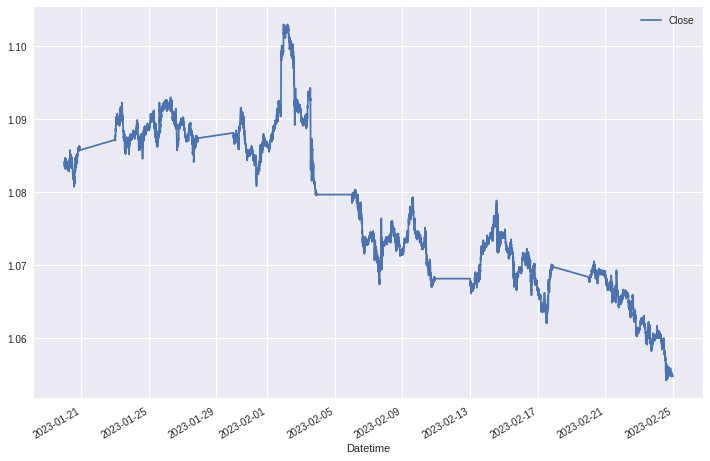

In [ ]:
data.plot(figsize = (12, 8))
plt.show()

In [ ]:
data.to_csv('data1.csv')

In [ ]:
data["returns"] = np.log(data[symbol] / data[symbol].shift())

In [ ]:
data

In [ ]:
data["returns"] = data["returns"].shift(-1)

In [ ]:
data

In [ ]:
data.dropna(inplace=True)

In [ ]:
window = 50

In [ ]:
df = data.copy()
df["dir"] = np.where(df["returns"] > 0, 1, 0)
df["sma"] = df[symbol].rolling(window).mean() - df[symbol].rolling(150).mean()
df["boll"] = (df[symbol] - df[symbol].rolling(window).mean()) / df[symbol].rolling(window).std()
df["min"] = df[symbol].rolling(window).min() / df[symbol] - 1
df["max"] = df[symbol].rolling(window).max() / df[symbol] - 1
df["mom"] = df["returns"].rolling(3).mean()
df["vol"] = df["returns"].rolling(window).std()
df.dropna(inplace = True)

In [ ]:
df

In [ ]:
lags = 20

In [ ]:
cols = []
features = ["dir", "sma", "boll", "min", "max", "mom", "vol"]

In [ ]:
for f in features:
        for lag in range(1, lags + 1):
            col = "{}_lag_{}".format(f, lag)
            df[col] = df[f].shift(lag)
            cols.append(col)
df.dropna(inplace = True)

<ipython-input-58-fd2994b3b473>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = df[f].shift(lag)


In [ ]:
df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6891 entries, 2023-02-20 02:49:00+00:00 to 2023-02-24 22:28:00+00:00
Columns: 149 entries, Close to vol_lag_20
dtypes: float64(148), int64(1)
memory usage: 7.9 MB


In [ ]:
len(cols)

140

In [ ]:
len(df)

7212

In [ ]:
split = int(len(df)*0.80)
split

5769

In [ ]:
train = df.iloc[:split].copy()


In [ ]:
test = df.iloc[split:].copy()


In [ ]:
train[cols]

In [ ]:
mu, std = train.mean(), train.std() # train set parameters (mu, std) for standardization

In [ ]:
std

Close        0.00220
returns      0.00018
dir          0.47205
sma          0.00048
boll         1.26741
               ...  
vol_lag_16   0.00004
vol_lag_17   0.00004
vol_lag_18   0.00004
vol_lag_19   0.00004
vol_lag_20   0.00004
Length: 149, dtype: float64

In [ ]:
train_s = (train - mu) / std # standardization of train set features

In [ ]:
train_s

In [ ]:
train_s.describe()

In [ ]:
from DNNModel import *

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# fitting a DNN model with 3 Hidden Layers (50 nodes each) and dropout regularization

set_seeds(100)
model = create_model(hl = 3, hu = 50, dropout = True, input_dim = len(cols))
model.fit(x = train_s[cols], y = train["dir"], epochs = 100, verbose = False,
          validation_split = 0.2, shuffle = False, class_weight = cw(train))

In [ ]:
model.evaluate(train_s[cols], train["dir"]) # evaluate the fit on the train set

181/181 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.6226


[0.6608126759529114, 0.6226382255554199]

In [ ]:
pred = model.predict(train_s[cols]) # prediction (probabilities)
pred

181/181 [==============================] - 0s 2ms/step


array([[0.47427085],
       [0.46031338],
       [0.5509211 ],
       ...,
       [0.44588858],
       [0.46105662],
       [0.51182866]], dtype=float32)

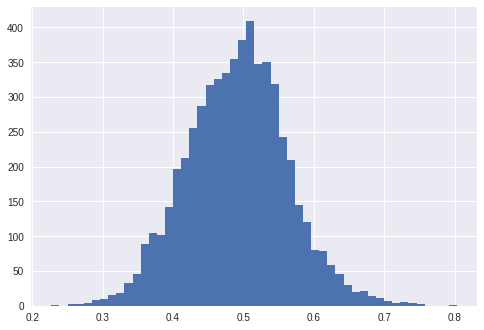

In [ ]:
plt.hist(pred, bins = 50)
plt.show()

## Out-Sample Prediction and Forward Testing

In [ ]:
test

In [ ]:
test_s = (test - mu) / std # standardization of test set features (with train set parameters!!!)

In [ ]:
model.evaluate(test_s[cols], test["dir"])

46/46 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5662


[0.6788281798362732, 0.5661815404891968]

In [ ]:
pred = model.predict(test_s[cols])
pred

46/46 [==============================] - 0s 2ms/step


array([[0.518315  ],
       [0.5157827 ],
       [0.47797334],
       ...,
       [0.46844494],
       [0.5210645 ],
       [0.52655333]], dtype=float32)

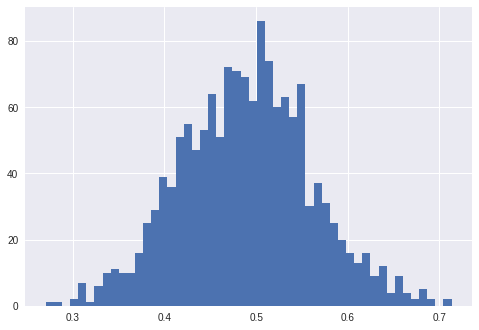

In [ ]:
plt.hist(pred, bins = 50);

In [ ]:
test["proba"] = model.predict(test_s[cols])

46/46 [==============================] - 0s 1ms/step


In [ ]:
test

In [ ]:
test["position"] = np.where(test.proba < 0.5, -1, np.nan) # 1. short where proba < 0.47

In [ ]:
test["position"] = np.where(test.proba > 0.5, 1, test.position) # 2. long where proba > 0.53

In [ ]:
test.to_csv('data2.csv')

In [ ]:
test.index = test.index.tz_localize("UTC")
test["NYTime"] = test.index.tz_convert("America/New_York")
test["hour"] = test.NYTime.dt.hour

In [ ]:
test.index = test.index.tz_convert("UTC")  # convert to UTC timezone
test["NYTime"] = test.index.tz_convert("America/New_York")  # convert to New York timezone
test["hour"] = test.NYTime.dt.hour  # extract hour of the day

In [ ]:
test["position"] = np.where(~test.hour.between(2, 12), 0, test.position) # 3. neutral in non-busy hours

In [ ]:
test["position"] = test.position.ffill().fillna(0) # 4. in all other cases: hold position

In [ ]:
test.to_csv('data3.csv')

In [ ]:
test.position.value_counts(dropna = False)

-1.00000    796
1.00000     647
Name: position, dtype: int64

In [ ]:
test["strategy"] = test["position"] * test["returns"]

In [ ]:
test["creturns"] = test["returns"].cumsum().apply(np.exp)
test["cstrategy"] = test["strategy"].cumsum().apply(np.exp)

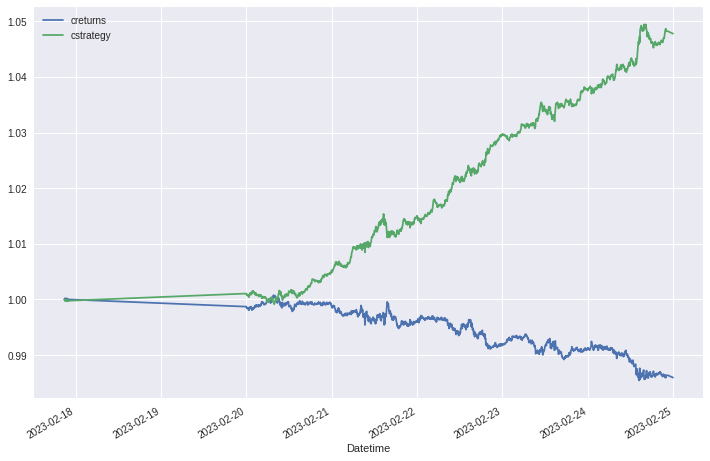

In [ ]:
test[["creturns", "cstrategy"]].plot(figsize = (12, 8))
plt.show()

In [ ]:
ptc = 0.000056

In [ ]:
test["trades"] = test.position.diff().abs()

In [ ]:
test.trades.value_counts()

0.00000    854
2.00000    588
Name: trades, dtype: int64

In [ ]:
test["strategy_net"] = test.strategy - test.trades * ptc

In [ ]:
test["cstrategy_net"] = test["strategy_net"].cumsum().apply(np.exp)

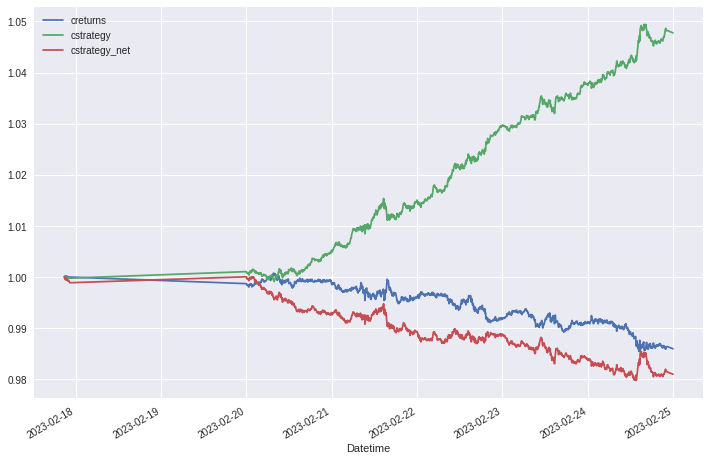

In [ ]:
test[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12, 8))
plt.show()

In [ ]:
model

In [ ]:
mu

Close         1.08065
returns      -0.00000
dir           0.40926
sma          -0.00015
boll          0.03762
               ...   
vol_lag_16    0.00033
vol_lag_17    0.00033
vol_lag_18    0.00033
vol_lag_19    0.00033
vol_lag_20    0.00033
Length: 149, dtype: float64

In [ ]:
std

Close        0.00946
returns      0.00036
dir          0.49174
sma          0.00158
boll         1.39165
               ...  
vol_lag_16   0.00015
vol_lag_17   0.00015
vol_lag_18   0.00015
vol_lag_19   0.00015
vol_lag_20   0.00015
Length: 149, dtype: float64

In [ ]:
model.save("DNN_model")

In [ ]:
import pickle

In [ ]:
params = {"mu":mu, "std":std}

In [ ]:
params

{'mu': Close         1.08065
 returns      -0.00000
 dir           0.40926
 sma          -0.00015
 boll          0.03762
                ...   
 vol_lag_16    0.00033
 vol_lag_17    0.00033
 vol_lag_18    0.00033
 vol_lag_19    0.00033
 vol_lag_20    0.00033
 Length: 149, dtype: float64, 'std': Close        0.00946
 returns      0.00036
 dir          0.49174
 sma          0.00158
 boll         1.39165
                ...  
 vol_lag_16   0.00015
 vol_lag_17   0.00015
 vol_lag_18   0.00015
 vol_lag_19   0.00015
 vol_lag_20   0.00015
 Length: 149, dtype: float64}

In [ ]:
pickle.dump(params, open("params.pkl", "wb"))

In [ ]:
!pip install fxcmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 6.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import fxcmpy
from datetime import datetime, timedelta
import time

In [ ]:
# Loading the model
import keras
model = keras.models.load_model("DNN_model")

In [ ]:
model

In [ ]:
# Loading mu and std
import pickle
params = pickle.load(open("params.pkl", "rb"))
mu = params["mu"]
std = params["std"]

In [ ]:
mu

Close         1.08065
returns      -0.00000
dir           0.40926
sma          -0.00015
boll          0.03762
               ...   
vol_lag_16    0.00033
vol_lag_17    0.00033
vol_lag_18    0.00033
vol_lag_19    0.00033
vol_lag_20    0.00033
Length: 149, dtype: float64

In [ ]:
std

Close        0.00946
returns      0.00036
dir          0.49174
sma          0.00158
boll         1.39165
               ...  
vol_lag_16   0.00015
vol_lag_17   0.00015
vol_lag_18   0.00015
vol_lag_19   0.00015
vol_lag_20   0.00015
Length: 149, dtype: float64

In [ ]:
class DNNTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, window, lags, model, mu, std, units):
        super().__init__(conf_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.raw_data = None
        self.data = None 
        self.last_bar = None
        self.units = units
        self.position = 0
        self.profits = []
        
        #*****************add strategy-specific attributes here******************
        self.window = window
        self.lags = lags
        self.model = model
        self.mu = mu
        self.std = std
        #************************************************************************
    
    def get_most_recent(self, days = 5):
        while True:
            time.sleep(2)
            now = datetime.utcnow()
            now = now - timedelta(microseconds = now.microsecond)
            past = now - timedelta(days = days)
            df = self.get_history(instrument = self.instrument, start = past, end = now,
                                   granularity = "S5", price = "M", localize = False).c.dropna().to_frame()
            df.rename(columns = {"c":self.instrument}, inplace = True)
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.utcnow()).tz_localize("UTC") - self.last_bar < self.bar_length:
                self.start_time = pd.to_datetime(datetime.utcnow()).tz_localize("UTC") # NEW -> Start Time of Trading Session
                break
                
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ", flush = True)
        
        recent_tick = pd.to_datetime(time)
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = self.tick_data.append(df)
        
        if recent_tick - self.last_bar > self.bar_length:
            self.resample_and_join()
            self.define_strategy()
            self.execute_trades()
    
    def resample_and_join(self):
        self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length, 
                                                                  label="right").last().ffill().iloc[:-1])
        self.tick_data = self.tick_data.iloc[-1:]
        self.last_bar = self.raw_data.index[-1]
    
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        #create features
        df = df.append(self.tick_data) # append latest tick (== open price of current bar)
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        df["dir"] = np.where(df["returns"] > 0, 1, 0)
        df["sma"] = df[self.instrument].rolling(self.window).mean() - df[self.instrument].rolling(150).mean()
        df["boll"] = (df[self.instrument] - df[self.instrument].rolling(self.window).mean()) / df[self.instrument].rolling(self.window).std()
        df["min"] = df[self.instrument].rolling(self.window).min() / df[self.instrument] - 1
        df["max"] = df[self.instrument].rolling(self.window).max() / df[self.instrument] - 1
        df["mom"] = df["returns"].rolling(3).mean()
        df["vol"] = df["returns"].rolling(self.window).std()
        df.dropna(inplace = True)
        
        # create lags
        self.cols = []
        features = ["dir", "sma", "boll", "min", "max", "mom", "vol"]

        for f in features:
            for lag in range(1, self.lags + 1):
                col = "{}_lag_{}".format(f, lag)
                df[col] = df[f].shift(lag)
                self.cols.append(col)
        df.dropna(inplace = True)
        
        # standardization
        df_s = (df - self.mu) / self.std
        # predict
        df["proba"] = self.model.predict(df_s[self.cols])
        
        #determine positions
        df = df.loc[self.start_time:].copy() # starting with first live_stream bar (removing historical bars)
        df["position"] = np.where(df.proba < 0.47, -1, np.nan)
        df["position"] = np.where(df.proba > 0.53, 1, df.position)
        df["position"] = df.position.ffill().fillna(0) # start with neutral position if no strong signal
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING LONG")
            elif self.position == -1:
                order = self.create_order(self.instrument, self.units * 2, suppress = True, ret = True) 
                self.report_trade(order, "GOING LONG")
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units * 2, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True) 
                self.report_trade(order, "GOING NEUTRAL")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING NEUTRAL")
            self.position = 0
    
    def report_trade(self, order, going):
        time = order["time"]
        units = order["units"]
        price = order["price"]
        pl = float(order["pl"])
        self.profits.append(pl)
        cumpl = sum(self.profits)
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | P&L = {} | Cum P&L = {}".format(time, units, price, pl, cumpl))
        print(100 * "-" + "\n")  

In [ ]:
trader = DNNTrader("oanda.cfg", "EUR_USD", bar_length = "20min",
                   window = 50, lags = 5, model = model, mu = mu, std = std, units = 100000)

In [ ]:
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 1000)
if trader.position != 0:
    close_order = trader.create_order(trader.instrument, units = -trader.position * trader.units,
                                      suppress = True, ret = True) 
    trader.report_trade(close_order, "GOING NEUTRAL")
    trader.position = 0

In [ ]:
trader.data

In [ ]:
api = fxcmpy.fxcmpy(config_file= "FXCM.cfg")

In [ ]:
col = ["tradeId", "amountK", "currency", "grossPL", "isBuy"]

In [ ]:
class DNNTrader():
    
    def __init__(self, instrument, bar_length, window, lags, model, mu, std, units):
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length) 
        self.tick_data = None
        self.raw_data = None
        self.data = None 
        self.ticks = 0
        self.last_bar = None  
        self.units = units
        self.position = 0
        
        #*****************add strategy-specific attributes here******************
        self.window = window
        self.lags = lags
        self.model = model
        self.mu = mu
        self.std = std
        #************************************************************************        
    
    def get_most_recent(self, period = "m1", number = 10000):
        while True:  
            time.sleep(5)
            df = api.get_candles(self.instrument, number = number, period = period, columns = ["bidclose", "askclose"])
            df[self.instrument] = (df.bidclose + df.askclose) / 2
            df = df[self.instrument].to_frame()
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.utcnow()) - self.last_bar < self.bar_length:
                self.start_time = pd.to_datetime(datetime.utcnow()) # NEW -> Start Time of Trading Session
                break
    
    def get_tick_data(self, data, dataframe):
        
        self.ticks += 1
        print(self.ticks, end = " ", flush = True)
        
        recent_tick = pd.to_datetime(data["Updated"], unit = "ms")
        
        if recent_tick - self.last_bar > self.bar_length:
            self.tick_data = dataframe.loc[self.last_bar:, ["Bid", "Ask"]]
            self.tick_data[self.instrument] = (self.tick_data.Ask + self.tick_data.Bid)/2
            self.tick_data = self.tick_data[self.instrument].to_frame()
            self.resample_and_join()
            self.define_strategy() 
            self.execute_trades()
            
    def resample_and_join(self):
        self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length, 
                                                             label="right").last().ffill().iloc[:-1])
        self.last_bar = self.raw_data.index[-1]  
        
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        df = df.append(self.tick_data.iloc[-1]) # append latest tick (== open price of current bar)
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        df["dir"] = np.where(df["returns"] > 0, 1, 0)
        df["sma"] = df[self.instrument].rolling(self.window).mean() - df[self.instrument].rolling(150).mean()
        df["boll"] = (df[self.instrument] - df[self.instrument].rolling(self.window).mean()) / df[self.instrument].rolling(self.window).std()
        df["min"] = df[self.instrument].rolling(self.window).min() / df[self.instrument] - 1
        df["max"] = df[self.instrument].rolling(self.window).max() / df[self.instrument] - 1
        df["mom"] = df["returns"].rolling(3).mean()
        df["vol"] = df["returns"].rolling(self.window).std()
        df.dropna(inplace = True)
        
        # create lags
        self.cols = []
        features = ["dir", "sma", "boll", "min", "max", "mom", "vol"]

        for f in features:
            for lag in range(1, self.lags + 1):
                col = "{}_lag_{}".format(f, lag)
                df[col] = df[f].shift(lag)
                self.cols.append(col)
        df.dropna(inplace = True)
        
        # standardization
        df_s = (df - self.mu) / self.std
        # predict
        df["proba"] = self.model.predict(df_s[self.cols])
        
        #determine positions
        df = df.loc[self.start_time:].copy() # starting with first live_stream bar (removing historical bars)
        df["position"] = np.where(df.proba < 0.47, -1, np.nan)
        df["position"] = np.where(df.proba > 0.53, 1, df.position)
        df["position"] = df.position.ffill().fillna(0) # start with neutral position if no strong signal
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING LONG")  
            elif self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING LONG")  
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING SHORT")  
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING SHORT")  
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL") 
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL")  
            self.position = 0

    def report_trade(self, order, going):
        time = order.get_time()
        units = api.get_open_positions().amountK.iloc[-1]
        price = api.get_open_positions().open.iloc[-1]
        unreal_pl = api.get_open_positions().grossPL.sum()
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | Unreal. P&L = {}".format(time, units, price, unreal_pl))
        print(100 * "-" + "\n")

In [ ]:
trader = DNNTrader("EUR/GBP", bar_length = "5min", 
                   window = 50, lags = 20, model = model, mu = mu, std = std, units = 100)

In [ ]:
trader.get_most_recent()
api.subscribe_market_data(trader.instrument, (trader.get_tick_data, ))

KeyboardInterrupt: ignored

In [ ]:
api.unsubscribe_market_data(trader.instrument)
if len(api.get_open_positions()) != 0: # if we have final open position(s) (netting and hedging)
    api.close_all_for_symbol(trader.instrument)
    print(2*"\n" + "{} | GOING NEUTRAL".format(str(datetime.utcnow())) + "\n")
    time.sleep(20)
    print(api.get_closed_positions_summary()[col])
    trader.position = 0

In [ ]:
trader.data

In [ ]:
api.close()